# Statistical Road Map

### Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
import scipy.stats as stats                                # Import the main scipy.stats module (general statistics)
from scipy.stats import shapiro, anderson, normaltest      # Normality tests: Shapiro–Wilk, Anderson–Darling, D’Agostino K²
from scipy.stats import kendalltau, spearmanr              # Rank correlation tests: Kendall’s tau, Spearman’s rho
from scipy.stats import pointbiserialr                     # Point–Biserial correlation (binary vs continuous)
from scipy.stats import chi2_contingency, fisher_exact     # Chi-Square test of independence, Fisher’s exact test
from scipy.stats import levene, bartlett                   # Variance equality tests: Levene’s (robust), Bartlett’s (normality assumed)
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Tukey’s Honestly Significant Difference (post-hoc comparisons)
from statsmodels.stats.oneway import anova_oneway          # One-way ANOVA (including Welch’s when use_var='unequal')
import pingouin as pg                                      # Import pingouin for Games-Howell test for unequal variances
import scikit_posthocs as sp

# Anscombe's Dataset
In 1973 Frank J. Anscombe presented four datasets descriptive statistics, but the distributions are very different.

In [3]:
df = pd.read_csv('datasets/anscombe.csv')

df.head()

,Dataset,x,y
0,A,10,8.04
1,A,8,6.95
2,A,13,7.58
3,A,9,8.81
4,A,11,8.33


In [4]:
anscombe_table = df.groupby('Dataset').agg({'x': ['mean', 'std'],
                                            'y': ['mean', 'std']})
anscombe_table.head()

x                   y          
        mean       std      mean       std
Dataset                                   
A        9.0  3.316625  7.500909  2.031568
B        9.0  3.316625  7.500909  2.031657
C        9.0  3.316625  7.500000  2.030424
D        9.0  3.316625  7.500909  2.030579

The mean and standard deviations of the four groups are the same.

In [5]:
df.groupby('Dataset').corr().round(2)

x     y
Dataset              
A       x  1.00  0.82
        y  0.82  1.00
B       x  1.00  0.82
        y  0.82  1.00
C       x  1.00  0.82
        y  0.82  1.00
D       x  1.00  0.82
        y  0.82  1.00

The correlation between the variables in each dataset is also the same.

In [6]:
a = df[df['Dataset'] == 'A'].drop('Dataset', axis=1)
b = df[df['Dataset'] == 'B'].drop('Dataset', axis=1)
c = df[df['Dataset'] == 'C'].drop('Dataset', axis=1)
d = df[df['Dataset'] == 'D'].drop('Dataset', axis=1)

a.head()

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33


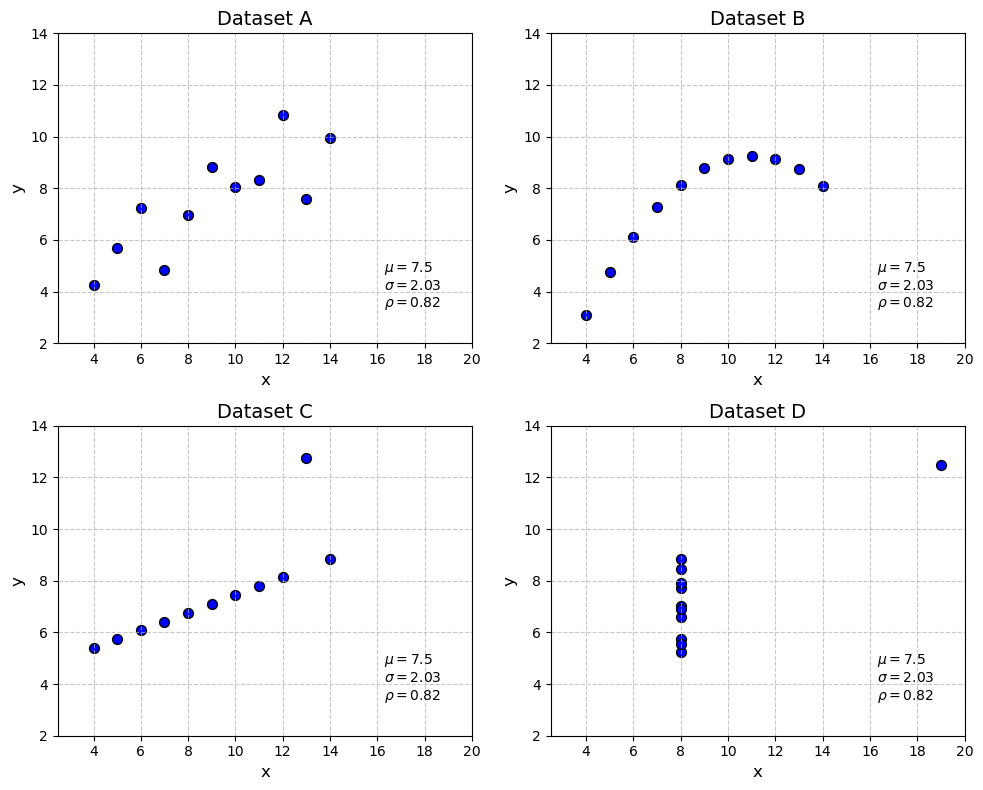

In [7]:
# Define the datasets (a, b, c, d)
datasets = {'Dataset A': a, 'Dataset B': b, 'Dataset C': c, 'Dataset D': d}

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and corresponding axes
for ax, (title, data) in zip(axes.ravel(), datasets.items()): # Loop over each axis and dataset (title + data)
    ax.scatter(data['x'],                                     # Plot 'x' values on the x-axis
               data['y'],                                     # Plot 'y' values on the y-axis
               color='blue',                                  # Fill points with blue color
               edgecolor='black',                             # Outline points with black edges
               label='Data Points',                           # Label for legend (not shown unless legend is added)
               s=50)                                          # Marker size set to 50
    ax.set_title(title, fontsize=14)                          # Set subplot title with font size 14
    ax.set_xlabel('x', fontsize=12)                           # Label x-axis as 'x' with font size 12
    ax.set_ylabel('y', fontsize=12)                           # Label y-axis as 'y' with font size 12
    ax.set_ylim(2,14)                                         # Set limits for y-axis
    ax.set_xlim(2.5,20)                                       # Set limits for x-axis
    ax.grid(visible=True, linestyle='--', alpha=0.7)          # Add dashed grid with transparency for readability
    #ax.legend(fontsize=10)                                   # Add legend

    # Add text with mean and std.dev in bottom-right corner
    ax.text(16.3, 3.2,
            r"$\mu = 7.5$" "\n" 
            r"$\sigma = 2.03$" "\n" 
            r"$\rho = 0.82$",
            fontsize=10, ha='left', va='bottom')              # Align text to left and bottom


plt.tight_layout()                                            # Adjust layout to prevent overlapping
plt.savefig('images/chp1_anscombe.png', dpi=300);             # Save this image
plt.show();                                                   # Show the plot

    Four different datasets—with identical summary statistics—can exhibit dramatically different patterns when graphed. It’s a powerful demonstration of why graphical analysis is essential in understanding data rather than relying solely on numerical summaries.

# Boxplot

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


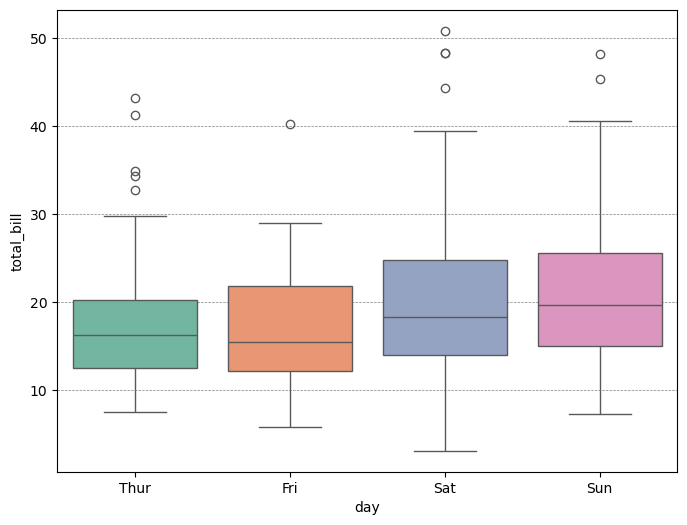

In [9]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create a boxplot to visualize the distribution of total bills across days of the week
ax = sns.boxplot(
    x="day",                # Set the x-axis to the 'day' column, representing days of the week
    y="total_bill",         # Set the y-axis to the 'total_bill' column, representing the total bill amounts
    data=tips,              # Specify the dataset to use, which is the 'tips' DataFrame
    hue="day",              # Use the 'day' variable for coloring the boxplots
    palette="Set2"          # Specify a colorful palette
)

# Add horizontal grid lines for better readability
plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, color="grey")  

plt.savefig('images/chp1_boxplot.png', dpi=300);  # Save this image
plt.show()                                        # Display the boxplot

# Histogram

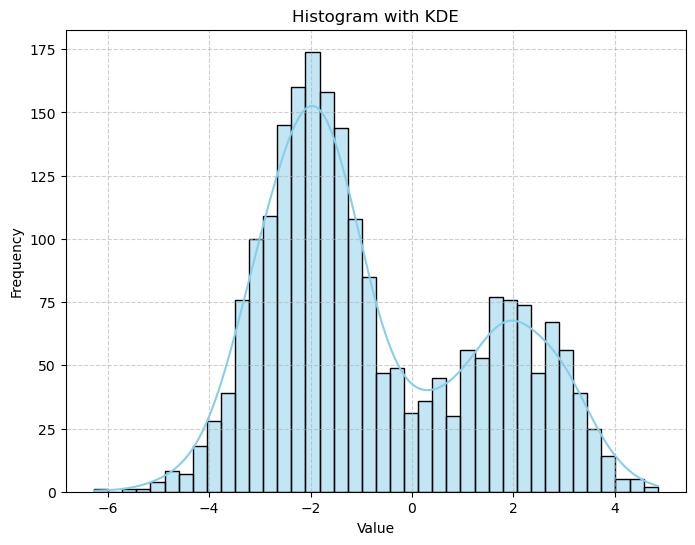

In [10]:
# Create bimodal data
data_left = np.random.normal(loc=-2, scale=1, size=1500)  # Larger left mode
data_right = np.random.normal(loc=2, scale=1, size=700)   # Smaller right mode
data3 = np.concatenate([data_left, data_right])           # Combine both

plt.figure(figsize=(8, 6))         # Set the figure size

# Plot histogram with KDE line
sns.histplot(data3,                # Data
             bins=40,              # Number of bins
             kde=True,             # Add KDE line
             color='skyblue',      # Histogram color
             edgecolor='black')    # Bin edges

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with KDE')

plt.grid(True, linestyle='--', alpha=0.6)           # Show grid
plt.savefig('images/chp1_histogram.png', dpi=300);  # Save this image
plt.show()                                          # Display the plot

### Model to create a Q-Q plot

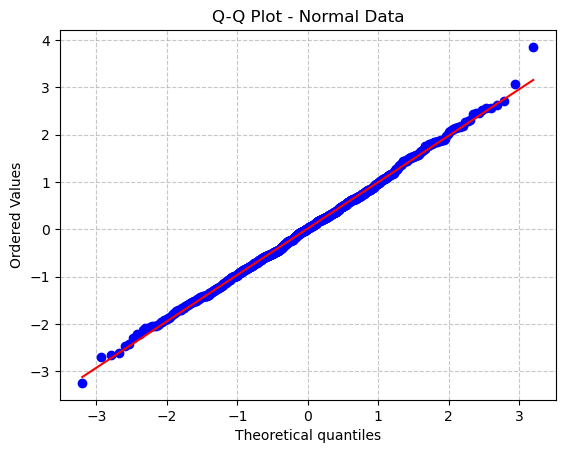

In [11]:
# Generate random data from a normal distribution
np.random.seed(42)                                           # Set random seed for reproducibility
data_normal = np.random.normal(loc=0, scale=1, size=1000)    # Normal distribution with Mean=0, Std=1, 1000 samples

# Create Q-Q plot comparing data with a normal distribution
stats.probplot(data_normal, dist="norm", plot=plt)           # Compare with normal quantiles
plt.title("Q-Q Plot - Normal Data")                          # Add title
plt.grid(True, linestyle='--', alpha=0.7)                    # Add grid with dashed lines and transparency
plt.savefig('images/chp1_qqplot_normal.png', dpi=300)        # Save this image
plt.show()                                                   # Display the plot

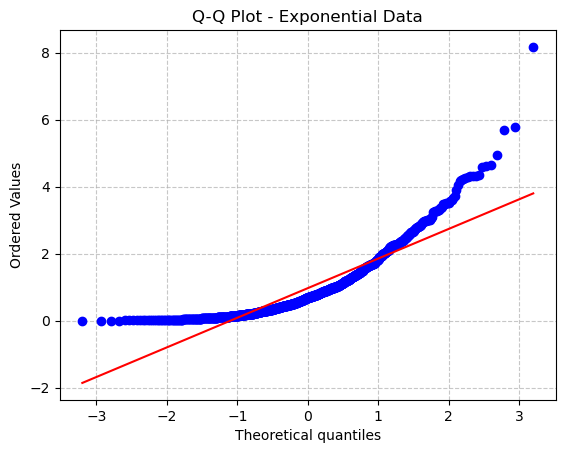

In [12]:
# Generate random data from a normal distribution
np.random.seed(42)                                           # Set random seed for reproducibility
data_expon = np.random.exponential(scale=1.0, size=1000)     # Exponential distribution with scale=1.0, 1000 samples

# Create Q-Q plot comparing data with a normal distribution
stats.probplot(data_expon, dist="norm", plot=plt)            # Compare with normal quantiles
plt.title("Q-Q Plot - Exponential Data")                     # Add title
plt.grid(True, linestyle='--', alpha=0.7)                    # Add grid with dashed lines and transparency
plt.savefig('images/chp1_qqplot_expon.png', dpi=300)         # Save this image
plt.show()                                                   # Display the plot

### Comparison of Normal and Non-Normal Distributions

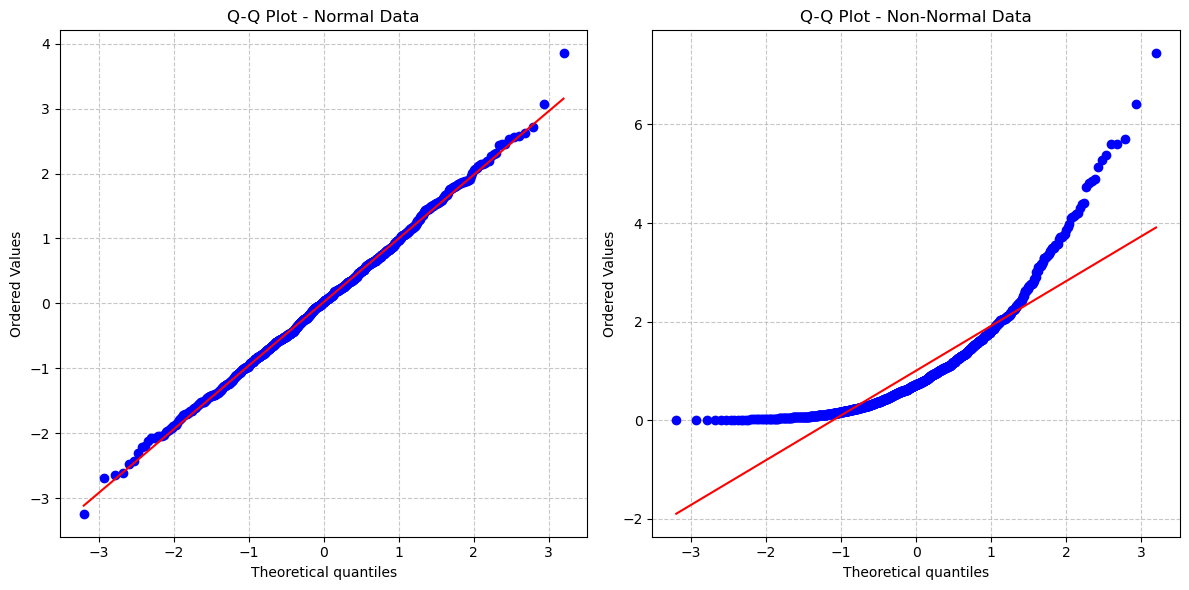

In [13]:
# Generate random data
np.random.seed(42)                                           # Set random seed for reproducibility
data_normal = np.random.normal(loc=0, scale=1, size=1000)    # Normal distribution with Mean=0, Std=1, 1000 samples
data_expon = np.random.exponential(scale=1.0, size=1000)     # Exponential distribution with scale=1.0, 1000 samples

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))              # Create a figure with 2 side-by-side plots

# Q-Q plot for normal data
stats.probplot(data_normal, dist="norm", plot=axes[0])       # Compare with normal quantiles
axes[0].set_title("Q-Q Plot - Normal Data")                  # Set title for left plot
axes[0].grid(True, linestyle='--', alpha=0.7)                # Add grid with dashed lines

# Q-Q plot for exponential data
stats.probplot(data_expon, dist="norm", plot=axes[1])        # Compare with normal quantiles
axes[1].set_title("Q-Q Plot - Non-Normal Data")              # Set title for right plot
axes[1].grid(True, linestyle='--', alpha=0.7)                # Add grid with dashed lines

# Adjust layout and save figure
plt.tight_layout()                                           # Adjust layout to prevent overlap
plt.savefig('images/chp1_qqplot_side_by_side.png', dpi=300)  # Save combined image
plt.show()                                                   # Display the figure

# Checking Normality

#### Practical tip:

$n < 50 \rightarrow$ **Shapiro-Wilk**: higher power for small samples.

$50 \le n \le 5{,}000 \rightarrow$ **D'Agostino $K^2$** : omnibus test (skewness + kurtosis).

$n \gg 5{,}000 \rightarrow$ **D'Agostino $K^2$** or **Anderson-Darling**: p-values tend to flag trivial deviations; focus on practical effect.

Tails/outliers are critical (any $n$) $\rightarrow$ **Anderson-Darling**: gives more weight to the extremes.

# Shapiro-Wilk

In [14]:
# Generate Data
np.random.seed(2025)                                   # Set random seed
dnormal = np.random.normal(loc=0, scale=1, size=40)    # Normal distribution with Mean=0, Std=1, 40 samples
sample1 = np.random.chisquare(8, 40)                   # Chi-squared with 8 DOF, size 40

# Shapiro_test Function
def shapiro_test(data, alpha=0.05):
    stat, p = shapiro(data)
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(stat, p))
    if p > alpha:
        print("Can not Reject the null hypothesis. The data seems to be normally distributed.")
    else:
        print("Reject the null hypothesis. The data does NOT seem to be normally distributed.")


print("Shapiro-Wilk Test for dnormal:")
shapiro_test(dnormal)
print()
print("Shapiro-Wilk Test for sample1:")
shapiro_test(sample1)

Shapiro-Wilk Test for dnormal:
stat = 0.9801, p-value= 0.6914
Can not Reject the null hypothesis. The data seems to be normally distributed.

Shapiro-Wilk Test for sample1:
stat = 0.9418, p-value= 0.0397
Reject the null hypothesis. The data does NOT seem to be normally distributed.


# D'Agostino K2

In [15]:
# Generate Data
np.random.seed(2025)                                   # Set random seed
dnormal = np.random.normal(loc=0, scale=1, size=400)   # Normal distribution with Mean=0, Std=1, 400 samples
sample2 = np.random.chisquare(8, 400)                  # Chi-squared with 8 DOF, size 400

# D’Agostino_test Function
def dagostino_test(data, alpha=0.05):
    k2, p = normaltest(data)
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(k2, p))
    if p > alpha:
        print("Can not Reject the null hypothesis. The data seems to be normally distributed.")
    else:
        print("Reject the null hypothesis. The data does NOT seem to be normally distributed.")


print("D'Agostino Test for dnormal:")
dagostino_test(dnormal)
print()
print("D'Agostino Test for sample2:")
dagostino_test(sample2)

D'Agostino Test for dnormal:
stat = 3.7559, p-value= 0.1529
Can not Reject the null hypothesis. The data seems to be normally distributed.

D'Agostino Test for sample2:
stat = 72.5439, p-value= 0.0000
Reject the null hypothesis. The data does NOT seem to be normally distributed.


# Anderson-Darling

In [16]:
# Generate Data
np . random . seed (2025)                                 # Set random seed
dnormal = np.random.normal(loc=0, scale=1, size=40000)    # Normal distribution with Mean=0, Std=1, 40000 samples
sample3 = np . random . chisquare (8 , 40000)             # Chi - squared with 8 DOF , size 40000

# Anderson_test Function
def anderson_test(data, alpha=0.05):
    stat, p = anderson(data)
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(stat, p))
    if p > alpha:
        print("Can not Reject the null hypothesis. The data seems to be normally distributed.")
    else:
        print("Reject the null hypothesis. The data does NOT seem to be normally distributed.")
        

print("Anderson-Darling Test for dnormal:")
dagostino_test (dnormal)
print()
print("Anderson-Darling Test for sample3:")
dagostino_test (sample3)

Anderson-Darling Test for dnormal:
stat = 0.6691, p-value= 0.7157
Can not Reject the null hypothesis. The data seems to be normally distributed.

Anderson-Darling Test for sample3:
stat = 5725.7772, p-value= 0.0000
Reject the null hypothesis. The data does NOT seem to be normally distributed.


# Correlation / Association

1. Both Variables are Continuous
   
        • Normal distribution: Use Pearson’s correlation (r).
        • Non-Normal Distribution or Non-Linear:
            – Monotonic relationships, larger samples: Use Spearman’s rho (ρ).
            – Small samples, many ties or outliers: Use Kendall’s tau (τ).
   
2. One Variable is Categorical

        • Continous Variable Normal: Use the Point–Biserial correlation (rpb).
        • Continous Variable Non-normal:
            – For group comparison: Use the Mann-Whitney U test (U).
            – If correlation coeficient is needed: Use Spearman’s rho (ρ).
3. Both Variables are Categorical

        • Large Sample *1: Use Chi-square test for independence (χ2).
        • Small Sample *2: Use Fisher’s exact test.
        • Ordinal Variables: Goodman-Kruskal’s gamma or Somers’ D for ordered categories.


*1 – Expected frequencies ≥5 in 80% of cells.\
*2 – Expected frequencies <5 or n < 20, especially for 2x2 tables.

# Pearson's Correlation (r)

In [17]:
# Simulated data
np.random.seed(42)                                         # Seed
x = np.random.normal(loc=5, scale=2, size=100)             # Source variable
y = 10 + 3*x + np.random.normal(loc=0, scale=3, size=100)  # Dependent variable

# Pearson Correlation
corr = np.corrcoef(x, y)[0,1]
print("Pearson Correlation:", corr.round(3))

Pearson Correlation: 0.872


# Spearman’s rho (ρ)

In [18]:
np.random.seed(42)                                      # Seed
n = 200                                                 # Sample size
x = np.random.chisquare(8, n)                           # Predictor (continuous)
y = np.log1p(x) + np.random.normal(0, 0.15, size=n)     # Monotonic non-linear relation + noise

def spearman_test(x, y, alpha=0.05, nan_policy="omit", alternative="two-sided"):
    rho, p = spearmanr(x, y, nan_policy=nan_policy, alternative=alternative)      # Spearman's rho and p-value
    print(f"Spearman rho = {rho:.3f}, p-value = {p:.3f}")                         # Report test statistics
    if p > alpha:                                                                 # Decision rule
        print("Fail to reject H0: no significant monotonic association detected.")
    else:
        print("Reject H0: evidence of a monotonic association.")

    
spearman_test(x, y)  

Spearman rho = 0.929, p-value = 0.000
Reject H0: evidence of a monotonic association.


# Kendall’s tau (τ )

In [19]:
np.random.seed(42)                                      # Seed
n = 200                                                 # Sample size
x = np.random.chisquare(8, n)                           # Predictor (continuous)
y = np.log1p(x) + np.random.normal(0, 0.15, size=n)     # Monotonic non-linear relation + noise

def kendall_test(x, y, alpha=0.05, nan_policy="omit", alternative="two-sided", method="auto"):
    tau, p = kendalltau(x, y, nan_policy=nan_policy, alternative=alternative, method=method)    # tau and p-value
    print(f"Kendall tau = {tau:.3f}, p-value = {p:.3f}")                                        # Report
    if p > alpha:                                                                               # Decision rule
        print("Fail to reject H0: no significant monotonic association detected.")
    else:
        print("Reject H0: evidence of a monotonic association.")


kendall_test(x, y)  

Kendall tau = 0.773, p-value = 0.000
Reject H0: evidence of a monotonic association.


# Point–Biserial correlation (rpb)

In [20]:
# Generate data
np.random.seed(2025)                              # Reproducibility
n_nonsmoker, n_smoker = 220, 180                  # Sample sizes

smoker = np.r_[np.zeros(n_nonsmoker, dtype=int),  # 0 = non-smoker
               np.ones(n_smoker, dtype=int)]      # 1 = smoker

resting_hr = np.r_[np.random.normal(loc=68, scale=8, size=n_nonsmoker),  # Non-smokers resting heart rate
                   np.random.normal(loc=74, scale=8, size=n_smoker)]     # Smokers resting heart rate

# Point–Biserial test
def point_biserial_test(cat, y, alpha=0.05):       
    r_pb, p = pointbiserialr(cat, y)                                     # Compute correlation and p-value
    print(f"rpb = {r_pb:.4f}, p-value = {p:.3f}")                        # Report
    if p > alpha:                                                        # Decision rule
        print("Fail to reject H0: no significant association.")
    else:
        print("Reject H0: evidence of association.")


print("Point–Biserial test (smoker vs. resting heart):")
point_biserial_test(smoker, resting_hr)

Point–Biserial test (smoker vs. resting heart):
rpb = 0.3541, p-value = 0.000
Reject H0: evidence of association.


# Spearman's $\rho$ (one categorical variable)

In [21]:
#Generate data: production line
np.random.seed(2025)                           # Reproducibility
n_ok, n_defect = 1200, 300                     # Unbalanced classes

defect = np.r_[np.zeros(n_ok, dtype=int),      # 0 = no defect
               np.ones(n_defect, dtype=int)]   # 1 = defect

cycle_time = np.r_[np.random.lognormal(mean=2.45, sigma=0.40, size=n_ok),     # Non-defective, faster
                   np.random.lognormal(mean=2.75, sigma=0.45, size=n_defect)] # Defective, take longer (rework, stoppages)


# Spearman test (rank-based, robust to non-normality)
def spearman_binary_test(cat, y, alpha=0.05, alternative="two-sided"):
    rho, p = spearmanr(cat, y, nan_policy="omit", alternative=alternative)    # Spearman's rho and p-value
    print(f"Spearman rho = {rho:.4f}, p-value = {p:.3f}")
    if p > alpha:
        print("Fail to reject H0: no significant monotonic association.")
    else:
        print("Reject H0: evidence of a monotonic association (longer cycle times, more defects).")


print("Spearman test: DEFECT (0/1) vs CYCLE TIME (min)")
spearman_binary_test(defect, cycle_time)

Spearman test: DEFECT (0/1) vs CYCLE TIME (min)
Spearman rho = 0.2666, p-value = 0.000
Reject H0: evidence of a monotonic association (longer cycle times, more defects).


# $\chi^2$ Test of Independence

In [22]:
# Simulated dataset
data = pd.DataFrame({
    'Group': [
        'High G','High G','High G','Cooperative','Cooperative','Cooperative', 'Local','Local','Local', 'Local',
        'Cooperative','High G','Local','Cooperative','High G','Local','Cooperative','High G','Local','Local']*4,
    'Product': ['A','B','A','A','A','C','C','C','B','B','A','A','C','C','B','B','A','A','C','C']*4
})

# Create contingency table
contingency = pd.crosstab(data['Group'], data['Product'])
print("Contingency Table:\n", contingency, "\n")

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)



# Show expected frequencies
expected_df = pd.DataFrame(expected, 
                           index=contingency.index, 
                           columns=contingency.columns)
print("Expected Frequencies:\n", expected_df.round(2))
print()

print("-- Chi-Square Test of Independence --")
print("        Chi-Square:", chi2.round(2))
print("Degrees of Freedom:", dof)
print("           p-value:", p.round(3), "\n")

# Decision
alpha = 0.05
if p > alpha:
    print("Fail to reject H0: no significant association between Custumer type and Product.")
else:
    print("Reject H0: evidence of association between Custumer type and Product.")

Contingency Table:
 Product       A   B   C
Group                  
Cooperative  16   0   8
High G       16   8   0
Local         0  12  20 

Expected Frequencies:
 Product         A    B     C
Group                       
Cooperative   9.6  6.0   8.4
High G        9.6  6.0   8.4
Local        12.8  8.0  11.2

-- Chi-Square Test of Independence --
        Chi-Square: 45.33
Degrees of Freedom: 4
           p-value: 0.0 

Reject H0: evidence of association between Custumer type and Product.


# Fisher’s Exact Test

In [23]:
# Dataset
data = pd.DataFrame({
    'Discount': ['Yes']*30 + ['No']*30,                          
    'Purchased': ['Yes']*25 + ['No']*5 + ['Yes']*15 + ['No']*15})

# Create 2x2 contingency table
contingency = pd.crosstab(data['Discount'], data['Purchased'])
print("Contingency Table:\n", contingency, "\n")

# Perform Fisher’s Exact Test
oddsratio, p_value = fisher_exact(contingency.values)

print("-- Fisher’s Exact Test --")
print("Odds Ratio:", round(oddsratio, 2))
print("   p-value:", round(p_value, 4))
print()

# Decision
alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0: No significant association between discount and purchase.")
else:
    print("Reject H0: Evidence of association between discount and purchase.")

Contingency Table:
 Purchased  No  Yes
Discount          
No         15   15
Yes         5   25 

-- Fisher’s Exact Test --
Odds Ratio: 5.0
   p-value: 0.0127

Reject H0: Evidence of association between discount and purchase.


# Comparing Variances

**1.	Two Groups**

    • Use F-test (for normal distributions).

    • Use Levene’s test or Brown-Forsythe (for robust comparisons).

**2.	More than Two Groups**

    • Use Bartlett’s test (robust to non-normality).

    • Use Levene’s test or Brown-Forsythe (for normal distributions).

# F-test

In [24]:
# Generate Datasets
np.random.seed(42)                                    # Reproducibility
n_A, n_B = 60, 55                                     # Sample sizes (days)
mu_A, mu_B = 120, 118                                 # Similar means (business as usual)
sigma_A, sigma_B = 25, 15                             # Different std devs (suspected variance change)

orders_A = np.random.normal(mu_A, sigma_A, n_A)       # Region A daily orders (approx. normal)
orders_B = np.random.normal(mu_B, sigma_B, n_B)       # Region B daily orders (approx. normal)

# F-test
var_A = np.var(orders_A, ddof=1)                      # Sample variance (unbiased)
var_B = np.var(orders_B, ddof=1)                      # Sample variance (unbiased)
df1, df2 = n_A - 1, n_B - 1                           # Degrees of freedom

F = var_A / var_B                                     # F statistic
cdf = stats.f.cdf(F, df1, df2)                        # Lower-tail probability
p_two = 2 * min(cdf, 1 - cdf)                         # Two-sided p-value

print("== F-test for Equality of Variances ==")
print(f"F statistic: {F:.2f} (df1={df1}, df2={df2})") # Report F and dfs
print(f"Two-sided p-value: {p_two:.4f}")              # Two-sided p-value
print()

# Decision Rule
alpha = 0.05                                          # Significance level
if p_two < alpha:
    print("Reject H0: Variances differ between regions.")            # Significant difference
else:
    print("Fail to reject H0: No evidence of variance difference.")  # Not significant

== F-test for Equality of Variances ==
F statistic: 2.52 (df1=59, df2=54)
Two-sided p-value: 0.0008

Reject H0: Variances differ between regions.


# Levene's and Brown–Forsythe Tests 

In [25]:
# Generate datasets: two production lines
np.random.seed(2025)                                 # Reproducibility
n_A, n_B = 60, 60                                    # Sample sizes (days)

line_A = np.random.normal(loc=50, scale=5, size=n_A) # Line A: stable cycle times    
line_B = np.random.normal(loc=50, scale=7, size=n_B) # Line B: more variability
line_B[:5] += 25                                     # Inject extreme outliers (machine stoppages)

stat_mean, p_mean = levene(line_A, line_B, center='mean')  # Levene’s test (mean-based)
stat_med, p_med = levene(line_A, line_B, center='median')  # Brown–Forsythe test (median-based)

print("==== Levene's and Brown–Forsythe Tests ====")
print(f"Levene’s (mean-based): stat = {stat_mean:.2f}, p-value = {p_mean:.4f}")
print(f"Brown–Forsythe (median-based): stat = {stat_med:.2f}, p-value = {p_med:.4f}\n")

# Decision rule (alpha = 0.05)
alpha = 0.05
if p_mean < alpha:
    print("Reject H0 (Levene's): Evidence of variance difference between lines.")
else:
    print("Fail to reject H0 (Levene's): No evidence of variance difference.")

if p_med < alpha:
    print("Reject H0 (Brown–Forsythe): Evidence of variance difference between lines.")
else:
    print("Fail to reject H0 (Brown–Forsythe): No evidence of variance difference.")

==== Levene's and Brown–Forsythe Tests ====
Levene’s (mean-based): stat = 17.75, p-value = 0.0000
Brown–Forsythe (median-based): stat = 15.62, p-value = 0.0001

Reject H0 (Levene's): Evidence of variance difference between lines.
Reject H0 (Brown–Forsythe): Evidence of variance difference between lines.


# Bartlett's Test

In [26]:
# Generate synthetic sales data for 3 regions (assumed normal)
np.random.seed(2025)                                
north = np.random.normal(loc=500, scale=20, size=50)   # North region (stable variance)
south = np.random.normal(loc=505, scale=20, size=50)   # South region (similar variance)
west  = np.random.normal(loc=495, scale=40, size=50)   # West region (higher variance)

# Bartlett’s test for equality of variances
stat, p = bartlett(north, south, west)

print("== Bartlett’s Test for Equality of Variances ==")
print(f"Test statistic: {stat:.2f}")
print(f"p-value: {p:.4f}\n")

# Decision rule (alpha = 0.05)
alpha = 0.05
if p < alpha:
    print("Reject H0: At least one region has a different variance in sales.")
else:
    print("Fail to reject H0: No evidence of variance difference between regions.")

== Bartlett’s Test for Equality of Variances ==
Test statistic: 47.80
p-value: 0.0000

Reject H0: At least one region has a different variance in sales.


# Levene's and Brown–Forsythe Tests (More than Two Groups)

In [27]:
# Simulate factory cycle times in minutes
np.random.seed(2025)                                 # Reproducibility
n_A, n_B, n_C = 300, 300, 300                        # Sample sizes per production line

# Base process: similar typical variability across lines           # Same general spread
line_A = np.random.lognormal(mean=2.30, sigma=0.25, size=n_A)      # Line A: baseline
line_B = np.random.lognormal(mean=2.30, sigma=0.25, size=n_B)      # Line B: baseline (will add outliers)
line_C = np.random.lognormal(mean=2.30, sigma=0.25, size=n_C)      # Line C: baseline

# Inject rare stoppages/outliers on Line B                         # Create extreme tail values
outliers_B = np.random.lognormal(mean=3.70, sigma=0.30, size=10)   # Large cycle times = breakdowns/rework
line_B[:len(outliers_B)] = outliers_B                              # Overwrite first elements with outliers

# Optional: assemble a DataFrame for reference                     # Helpful for quick inspection
df = pd.DataFrame({
    "cycle_time": np.r_[line_A, line_B, line_C],                   # Concatenate all lines
    "line": (["A"] * n_A) + (["B"] * n_B) + (["C"] * n_C)          # Line labels
})

# -----------------------------
# Levene’s test (center = 'mean') → classic Levene                 # More sensitive to non-normality/outliers
# -----------------------------
stat_mean, p_mean = levene(line_A, line_B, line_C, center='mean')  # Mean-based deviations
alpha = 0.05                                                       # Significance level

print("== Levene’s Test (center='mean') ==")                       # Header
print(f"Statistic: {stat_mean:.3f}, p-value: {p_mean:.4f}")        # Report test statistic and p-value
if p_mean < alpha:                                                 # Decision rule
    print("Reject H0: At least one line differs in variance (mean-based).")     
else:
    print("Fail to reject H0: No evidence of variance difference (mean-based).")
print()                                                                          

# -----------------------------
# Brown–Forsythe (center = 'median') → robust to outliers          # Uses median-based deviations
# -----------------------------
stat_med, p_med = levene(line_A, line_B, line_C, center='median')  # Median-based (Brown–Forsythe)
print("== Brown–Forsythe (center='median') ==")                    # Header
print(f"Statistic: {stat_med:.3f}, p-value: {p_med:.4f}")          # Report test statistic and p-value
if p_med < alpha:                                                  # Decision rule
    print("Reject H0: At least one line differs in variance (median-based).")
else:
    print("Fail to reject H0: No evidence of variance difference (median-based).")
print()

# -----------------------------
# Practical reading for managers             # Brief operational takeaway
# -----------------------------
if (p_mean < alpha) and (p_med < alpha):     # Both tests significant
    print("Interpretation: Variance differences are robust (not driven solely by outliers).")
elif (p_mean < alpha) and (p_med >= alpha):  # Only mean-based significant
    print("Interpretation: Apparent variance difference may be driven by outliers (median-based test is non-significant).")
else:                                        # Neither significant
    print("Interpretation: No strong evidence that the lines differ in variability.")

== Levene’s Test (center='mean') ==
Statistic: 10.894, p-value: 0.0000
Reject H0: At least one line differs in variance (mean-based).

== Brown–Forsythe (center='median') ==
Statistic: 6.095, p-value: 0.0023
Reject H0: At least one line differs in variance (median-based).

Interpretation: Variance differences are robust (not driven solely by outliers).


# Comparing Means

1. `Two Groups`
   
• Independent Samples

    – Check normality
        ∗ Normal: Check Variances
            · Equal: T-test (pooled)
            · Unequal: Welch’s t-test (preferable if in doubt).
        ∗ Non-Normal: Mann-Whitney U test
        
• Dependent (Paired) Samples

    – Check normality of differences
        ∗ Normal: Paired T-test
        ∗ Non-Normal: Wilcoxon Signed-Rank test

2. `More than Two Groups`

• Independent Samples

    – Check normality
        ∗ Normal: Check Variances
            · Equal: One-way ANOVA (post-hoc: Tukey)
            · Unequal: Welch’s ANOVA (post-hoc: Games-Howell)
        ∗ Non-Normal: Kruskal-Wallis test (post-hoc: Dunn’s)

• Dependent Samples (Repeated Measures)

    – Check normality of differences and sphericity (Mauchly)
        ∗ Normal + Sphericity: Repeated Measures ANOVA ((Fix with G-G/H-F if violates; post-hoc: paired T with Bonferroni)
        ∗ Non-Normal: Friedman test (post-hoc: Wilcoxon signed-rank with Bonferroni)

# Pooled T-test

2 groups, Independent Samples, both normal, equal variances.

In [28]:
# Generate data
np.random.seed(25)                      # Reproducibility
n_A, n_B = 120, 120                     # Sample sizes (independent groups)
mu_A, mu_B = 100.0, 105.0               # Group means (B > A for one-sided question)
sigma = 15.0                            # Common population SD (equal variances by design)

A = np.random.normal(mu_A, sigma, n_A)  # Group A ~ Normal(μA, σ)
B = np.random.normal(mu_B, sigma, n_B)

# Pooled t-test
res_pooled = stats.ttest_ind(B, A, equal_var=True, alternative='greater')

print("== Pooled Two-Sample t-test ==")
print(f"t statistic: {res_pooled.statistic:.2f}")               # Report t statistic
print(f"One-sided p-value (μB > μA): {res_pooled.pvalue:.4f}")  # One-sided p-value
print()

# Decision Rule
alpha = 0.05                                                    # Significance level
if res_pooled.pvalue < alpha:
    print("Reject H0: Evidence that Group B has a higher mean than Group A.") # Significant result
else:
    print("Fail to reject H0: No evidence that Group B has a higher mean.")   # Not significant

== Pooled Two-Sample t-test ==
t statistic: 2.52
One-sided p-value (μB > μA): 0.0062

Reject H0: Evidence that Group B has a higher mean than Group A.


# Welch’s t-test
2 groups, Independent Samples, both normal, unequal variances.

In [29]:
# Generate Data
np.random.seed(25)                        # Reproducibility
n_A, n_B = 120, 120                       # Sample sizes (independent groups)
mu_A, mu_B = 100.0, 105.0                 # Group means (B > A for one-sided question)
sigma1, sigma2 = 13.0, 15.0               # Common population SD (unequal variances by design)

A = np.random.normal(mu_A, sigma1, n_A)   # Group A
B = np.random.normal(mu_B, sigma2, n_B)   # Group B

# Welch’s t-test
res_welch = stats.ttest_ind(B, A, equal_var=False, alternative='greater')

print("== Welch's Two-Sample t-test ==")
print(f"t statistic: {res_welch.statistic:.2f}")       # Report t statistic
print(f"One-sided p-value (μB > μA): {res_welch.pvalue:.4f}")  # One-sided p-value
print()

# Decision Rule
alpha = 0.05
if res_welch.pvalue < alpha:
    print("Reject H0: Evidence that Branch B has a higher mean than Branch A.")
else:
    print("Fail to reject H0: No evidence that Branch B has a higher mean.")

== Welch's Two-Sample t-test ==
t statistic: 2.62
One-sided p-value (μB > μA): 0.0047

Reject H0: Evidence that Branch B has a higher mean than Branch A.


# Mann-Whitney U test 

2 groups, independent, non-normal distributions.

In [30]:
# Generate Data (skewed ratings 1–10)
np.random.seed(25)                                   # Reproducibility
n_A, n_B = 120, 120                                  # Sample sizes (independent groups)

# Store A: more low ratings, skewed distribution
A = np.random.choice([2, 3, 4, 5, 6, 7, 8, 9], size=n_A, p=[0.15, 0.10, 0.10, 0.15, 0.15, 0.15, 0.10, 0.10])

# Store B: more high ratings, skewed distribution
B = np.random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10], size=n_B, p=[0.05, 0.05, 0.05, 0.10, 0.10, 0.15, 0.20, 0.15, 0.15])


# Mann–Whitney U test (non-parametric, one-sided H1: B > A)
res_mw = stats.mannwhitneyu(B, A, alternative='greater')

print("== Mann–Whitney U test ==")
print(f"U statistic: {res_mw.statistic:.2f}")                         # Report U statistic
print(f"One-sided p-value (Store B > Store A): {res_mw.pvalue:.4f}")  # One-sided p-value
print()

# Decision Rule
alpha = 0.05
if res_mw.pvalue < alpha:
    print("Reject H0: Evidence that Store B has higher satisfaction ratings than Store A.")
else:
    print("Fail to reject H0: No evidence that Store B has higher satisfaction ratings.")

== Mann–Whitney U test ==
U statistic: 10004.50
One-sided p-value (Store B > Store A): 0.0000

Reject H0: Evidence that Store B has higher satisfaction ratings than Store A.


# Paired T-test

2 groups, dependent, normal distributions

In [31]:
# Generate Data (Workout times in minutes)
np.random.seed(42)                         # Reproducibility
n_clients = 40                             # Sample size (paired observations)

before = np.random.normal(loc=50, scale=5, size=n_clients)          # Times before program
after  = before - np.random.normal(loc=3, scale=2, size=n_clients)  # After program


# Paired t-test (same clients measured twice)
res_paired = stats.ttest_rel(before, after, alternative='greater') 

print("== Paired t-test ==")
print(f"t statistic: {res_paired.statistic:.2f}")                      # Report t statistic
print(f"One-sided p-value (After < Before): {res_paired.pvalue:.4f}")  # One-sided p-value
print()

# Decision Rule
alpha = 0.05
if res_paired.pvalue < alpha:
    print("Reject H0: Evidence that clients complete workouts faster after the program.")
else:
    print("Fail to reject H0: No evidence of improvement in workout times.")

== Paired t-test ==
t statistic: 9.64
One-sided p-value (After < Before): 0.0000

Reject H0: Evidence that clients complete workouts faster after the program.


# Wilcoxon Signed-Rank test

2 groups, dependent, non-normal distributions

In [32]:
# Generate Data (Customer waiting times in minutes)
np.random.seed(42)                                       # Reproducibility
n_locations = 30                                         # Number of locations (paired observations)

before = np.random.exponential(scale=15, size=n_locations)          # Skewed distribution (before system)
after  = before - np.random.exponential(scale=5, size=n_locations)  # After system: shorter on average


# Wilcoxon Signed-Rank test (non-parametric paired test)
res_wilcoxon = stats.wilcoxon(before, after, alternative='greater')

print("== Wilcoxon Signed-Rank test ==")
print(f"Statistic: {res_wilcoxon.statistic:.2f}")                        # Report test statistic
print(f"One-sided p-value (After < Before): {res_wilcoxon.pvalue:.4f}")  # One-sided p-value
print()

# Decision Rule
alpha = 0.05
if res_wilcoxon.pvalue < alpha:
    print("Reject H0: Evidence that waiting times are shorter after the new system.")
else:
    print("Fail to reject H0: No evidence of shorter waiting times after the new system.")

== Wilcoxon Signed-Rank test ==
Statistic: 465.00
One-sided p-value (After < Before): 0.0000

Reject H0: Evidence that waiting times are shorter after the new system.


# One-Way ANOVA

More than 2 groups, independent samples, normal distributions, equal variances

In [36]:
# -----------------------------
# Generate Data (Monthly sales by strategy)
# -----------------------------
np.random.seed(25)                          # Reproducibility
n_tv = n_online = n_print = 60              # Sample sizes per strategy

# Simulate approximately normal sales with similar variances
sales_tv     = np.random.normal(loc=120, scale=15, size=n_tv)     # TV
sales_online = np.random.normal(loc=132, scale=15, size=n_online) # Online (higher mean)
sales_print  = np.random.normal(loc=118, scale=15, size=n_print)  # Print

# Assemble long-format DataFrame (useful for Tukey)
df = pd.DataFrame({
    "sales": np.r_[sales_tv, sales_online, sales_print],
    "strategy": (["TV"]*n_tv) + (["Online"]*n_online) + (["Print"]*n_print)})

# -----------------------------
# One-Way ANOVA
# -----------------------------
F, p_anova = stats.f_oneway(sales_tv, sales_online, sales_print)

print("========== One-Way ANOVA ==========")
print(f"F statistic: {F:.2f}")
print(f"p-value: {p_anova:.4f}")
print(f"Group means (TV, Online, Print): {np.mean(sales_tv):.2f}, {np.mean(sales_online):.2f}, {np.mean(sales_print):.2f}\n")

# Decision Rule
alpha = 0.05
if p_anova < alpha:
    print("Reject H0: Evidence that at least one strategy has a different mean sales.\n")

    # -----------------------------
    # Tukey’s HSD post-hoc (identify which pairs differ)
    # -----------------------------
    tukey = pairwise_tukeyhsd(endog=df["sales"], groups=df["strategy"], alpha=alpha)
    print("========== Tukey's HSD Post-hoc ==========")
    print(tukey.summary())
    print("\nInterpretation: 'reject=True' indicates a significant difference for that pair.")
else:
    print("Fail to reject H0: No evidence of differences in mean sales across strategies.")

========== One-Way ANOVA ==========
F statistic: 9.33
p-value: 0.0001
Group means (TV, Online, Print): 120.66, 129.47, 117.10

Reject H0: Evidence that at least one strategy has a different mean sales.

========== Tukey's HSD Post-hoc ==========
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Online  Print -12.3644 0.0001 -19.3299 -5.3989   True
Online     TV  -8.8045  0.009   -15.77  -1.839   True
 Print     TV   3.5599   0.45  -3.4056 10.5254  False
-----------------------------------------------------

Interpretation: 'reject=True' indicates a significant difference for that pair.


# Welch’s ANOVA

More than 2 groups, independent samples, normal distributions, unequal variances

In [56]:
# Generate Data (ARPU by plan; unequal n and unequal variances)
np.random.seed(25)                                 # Reproducibility
n_basic, n_standard, n_premium = 80, 140, 220      # Unequal sample sizes (unbalanced markets)

# ARPU means and standard deviations (heteroscedastic)
mu_basic,    sd_basic    = 18.0, 5.0
mu_standard, sd_standard = 22.0, 7.5
mu_premium,  sd_premium  = 27.0, 9.5

basic    = np.random.normal(mu_basic,    sd_basic,    n_basic)
standard = np.random.normal(mu_standard, sd_standard, n_standard)
premium  = np.random.normal(mu_premium,  sd_premium,  n_premium)

# Long-format DataFrame for convenience
df = pd.DataFrame({"ARPU": np.r_[basic, standard, premium],
                   "plan": (["Basic"] * n_basic) + (["Standard"] * n_standard) + (["Premium"] * n_premium)})

# Welch’s ANOVA (no equal-variance assumption; robust to unequal n)
wa = anova_oneway(df["ARPU"], groups=df["plan"], use_var="unequal")  # Welch's
F_welch = wa.statistic
df_num, df_den = wa.df  # numerator, denominator dfs
p_welch = wa.pvalue

print("============ Welch’s ANOVA ============")
print(f"F({df_num:.2f}, {df_den:.2f}) = {F_welch:.2f}")
print(f"p-value: {p_welch:.4f}")
print(f"Group means (Basic, Standard, Premium): "
      f"{basic.mean():.2f}, {standard.mean():.2f}, {premium.mean():.2f}\n")

# Decision rule
alpha = 0.05
if p_welch < alpha:
    print("Reject H0: Evidence that at least one plan has a different mean ARPU.\n")

    # Games–Howell post-hoc (pairwise, unequal variances and n)
    gh = pg.pairwise_gameshowell(dv="ARPU", between="plan", data=df)  # Games-Howell test
    print("====== Games–Howell Post-hoc (p-values) ======")
    print(gh.round(4))
    print("\nInterpretation: p < 0.05 indicates a significant pairwise difference.\n")
else:
    print("Fail to reject H0: No evidence of differences in mean ARPU across plans.")

============ Welch’s ANOVA ============
F(2.00, 247.85) = 56.16
p-value: 0.0000
Group means (Basic, Standard, Premium): 18.15, 21.12, 27.66

Reject H0: Evidence that at least one plan has a different mean ARPU.

====== Games–Howell Post-hoc (p-values) ======
         A         B  mean(A)  mean(B)    diff      se        T        df  \
0    Basic   Premium  18.1519  27.6589 -9.5070  0.9138 -10.4035  236.3100   
1    Basic  Standard  18.1519  21.1203 -2.9683  0.9258  -3.2064  206.0702   
2  Premium  Standard  27.6589  21.1203  6.5386  0.9342   6.9993  336.1276   

     pval  hedges  
0  0.0000 -1.0775  
1  0.0044 -0.4110  
2  0.0000  0.7225  

Interpretation: p < 0.05 indicates a significant pairwise difference.



# Kruskal-Wallis test

More than 2 groups, independent samples, non-normal distributions

In [59]:
# Generate Data (Customer satisfaction 1–10; ordinal & skewed)
np.random.seed(25)                                  # Reproducibility
n_dinein, n_takeout, n_delivery = 120, 150, 180     # Unequal sample sizes

# Skewed/ordinal ratings for each service model
dinein = np.random.choice([2,3,4,5,6,7,8,9,10], size=n_dinein, p=[0.05,0.05,0.07,0.10,0.12,0.18,0.18,0.15,0.10])
takeout = np.random.choice([2,3,4,5,6,7,8,9,10], size=n_takeout, p=[0.08,0.08,0.10,0.14,0.16,0.16,0.12,0.10,0.06])
delivery = np.random.choice([2,3,4,5,6,7,8,9,10], size=n_delivery, p=[0.04,0.04,0.06,0.10,0.14,0.18,0.18,0.16,0.10])

# Long-format DataFrame for convenience
df = pd.DataFrame({"rating": np.r_[dinein, takeout, delivery],
                  "service": (["Dine-in"] * n_dinein) + (["Takeout"] * n_takeout) + (["Delivery"] * n_delivery)})

# Kruskal–Wallis (non-parametric omnibus, H0: distributions equal across groups)
H, p_kw = stats.kruskal(dinein, takeout, delivery)
print("============ Kruskal–Wallis Test ============")
print(f"H statistic: {H:.2f}")
print(f"p-value: {p_kw:.4f}")
print(f"Group medians (Dine-in, Takeout, Delivery): "
      f"{np.median(dinein):.2f}, {np.median(takeout):.2f}, {np.median(delivery):.2f}\n")

# Decision rule
alpha = 0.05
if p_kw < alpha:
    print("Reject H0: Evidence that at least one service model differs in satisfaction distribution.\n")

    # Dunn’s post-hoc (pairwise, non-parametric; adjust for multiplicity)
    dunn = sp.posthoc_dunn(df, val_col="rating", group_col="service", p_adjust="holm")
    print("====== Dunn’s Post-hoc (Holm-adjusted p-values) ======")
    print(dunn.round(4))
    print("\nInterpretation: p < 0.05 indicates a significant pairwise difference.\n")
else:
    print("Fail to reject H0: No evidence of differences in satisfaction across service models.")

============ Kruskal–Wallis Test ============
H statistic: 26.13
p-value: 0.0000
Group medians (Dine-in, Takeout, Delivery): 7.00, 6.00, 7.00

Reject H0: Evidence that at least one service model differs in satisfaction distribution.

====== Dunn’s Post-hoc (Holm-adjusted p-values) ======
          Delivery  Dine-in  Takeout
Delivery    1.0000   0.1306   0.0000
Dine-in     0.1306   1.0000   0.0037
Takeout     0.0000   0.0037   1.0000

Interpretation: p < 0.05 indicates a significant pairwise difference.

